# Project 1: Solar Flares
## By Alejandro Rigau
### 3/4/2021

---

# Part 1: Data scraping and preparation

## Step 1: Scrape your competitor's data
Here I use the html parser from BeautifulSoup to get the html from the page. From there, I find the table, and then load it to a pandas dataframe. 

In [1]:
import requests
import pandas as pd
import numpy as np
import datetime #for step 2
from bs4 import BeautifulSoup

In [2]:
url = 'https://cmsc320.github.io/files/top-50-solar-flares.html'
page = requests.get(url)
soup = BeautifulSoup(page.text, 'html.parser')

In [3]:
# print(soup.prettify())

In [4]:
table = soup.find('table')
# print(table)

In [5]:
space = pd.read_html(str(table))[0]
space.columns = ["rank", "x_classification", "date", "region", "start_time", "maximum_time", "end_time", "movie"]
space

,rank,x_classification,date,region,start_time,maximum_time,end_time,movie
0,1,X28+,2003/11/04,486,19:29,19:53,20:06,MovieView archive
1,2,X20+,2001/04/02,9393,21:32,21:51,22:03,MovieView archive
2,3,X17.2+,2003/10/28,486,09:51,11:10,11:24,MovieView archive
3,4,X17+,2005/09/07,808,17:17,17:40,18:03,MovieView archive
4,5,X14.4,2001/04/15,9415,13:19,13:50,13:55,MovieView archive
5,6,X10,2003/10/29,486,20:37,20:49,21:01,MovieView archive
6,7,X9.4,1997/11/06,8100,11:49,11:55,12:01,MovieView archive
7,8,X9.3,2017/09/06,2673,11:53,12:02,12:10,MovieView archive
8,9,X9,2006/12/05,930,10:18,10:35,10:45,MovieView archive
9,10,X8.3,2003/11/02,486,17:03,17:25,17:39,MovieView archive


## Step 2: Tidy the top 50 solar flare data
### 2.1 Dropping movie

In [6]:
space = space.drop('movie', 1)
space.head(2)

,rank,x_classification,date,region,start_time,maximum_time,end_time
0,1,X28+,2003/11/04,486,19:29,19:53,20:06
1,2,X20+,2001/04/02,9393,21:32,21:51,22:03


### 2.2 and 2.3 Date time combination
Here I add the strings from date and the clock time and use the to_datetime function to automatically generate the correct format and then drop the unnecessary columns.

In [7]:
space['start_datetime'] = pd.to_datetime(space['date']+ " " +space['start_time'])
space['max_datetime'] = pd.to_datetime(space['date']+ " " +space['maximum_time'])
space['end_datetime'] = pd.to_datetime(space['date']+ " " +space['end_time'])
space = space.drop('start_time', 1)
space = space.drop('maximum_time', 1)
space = space.drop('end_time', 1)
space = space.drop('date', 1)

temp = space['region'] # basically moving it to the end
space = space.drop('region', 1)
space['region'] = temp

### 2.4 drop nan
Here I use standard pandas function to replace all '-' in the dataset. Lastly, I print out my final dataframe for this part.

In [8]:
space = space.replace('-', np.nan) #step 2.4

In [9]:
space

,rank,x_classification,start_datetime,max_datetime,end_datetime,region
0,1,X28+,2003-11-04 19:29:00,2003-11-04 19:53:00,2003-11-04 20:06:00,486
1,2,X20+,2001-04-02 21:32:00,2001-04-02 21:51:00,2001-04-02 22:03:00,9393
2,3,X17.2+,2003-10-28 09:51:00,2003-10-28 11:10:00,2003-10-28 11:24:00,486
3,4,X17+,2005-09-07 17:17:00,2005-09-07 17:40:00,2005-09-07 18:03:00,808
4,5,X14.4,2001-04-15 13:19:00,2001-04-15 13:50:00,2001-04-15 13:55:00,9415
5,6,X10,2003-10-29 20:37:00,2003-10-29 20:49:00,2003-10-29 21:01:00,486
6,7,X9.4,1997-11-06 11:49:00,1997-11-06 11:55:00,1997-11-06 12:01:00,8100
7,8,X9.3,2017-09-06 11:53:00,2017-09-06 12:02:00,2017-09-06 12:10:00,2673
8,9,X9,2006-12-05 10:18:00,2006-12-05 10:35:00,2006-12-05 10:45:00,930
9,10,X8.3,2003-11-02 17:03:00,2003-11-02 17:25:00,2003-11-02 17:39:00,486


## Step 3: Scrape the NASA data
Here we cant use BeautifulSoup to find the table tag but I can use it to get the text and separate it later by each line and by spaces. I also remove the header part of the table and the footer. Lastly, I go thorough each line and I split each string into their columns.

In [10]:
url = 'http://www.hcbravo.org/IntroDataSci/misc/waves_type2.html'
page = requests.get(url)
soup = BeautifulSoup(page.text, 'html.parser')

In [11]:
table = soup.find('pre')
table = table.text.split('\n')
table = table[12:-3] # remove unwanted parts of the table (top and bottom)
for row_index in range(len(table)):
    table[row_index] = table[row_index].split()[:14]

In [12]:
nasa = pd.DataFrame(table)
nasa.columns = ['start_date', 'start_time', 'end_date', 'end_time', 'start_frequency', 'end_frequency', 'flare_location', 'flare_region','flare_classification', 'cme_date', 'cme_time', 'cme_angle', 'cme_width', 'cme_speed']
nasa

,start_date,start_time,end_date,end_time,start_frequency,end_frequency,flare_location,flare_region,flare_classification,cme_date,cme_time,cme_angle,cme_width,cme_speed
0,1997/04/01,14:00,04/01,14:15,8000,4000,S25E16,8026,M1.3,04/01,15:18,74,79,312
1,1997/04/07,14:30,04/07,17:30,11000,1000,S28E19,8027,C6.8,04/07,14:27,Halo,360,878
2,1997/05/12,05:15,05/14,16:00,12000,80,N21W08,8038,C1.3,05/12,05:30,Halo,360,464
3,1997/05/21,20:20,05/21,22:00,5000,500,N05W12,8040,M1.3,05/21,21:00,263,165,296
4,1997/09/23,21:53,09/23,22:16,6000,2000,S29E25,8088,C1.4,09/23,22:02,133,155,712
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
477,2014/12/13,14:27,12/13,14:51,14000,3900,W90b,-----,----,12/13,14:24,Halo,360,2222
478,2014/12/17,04:09,12/17,04:19,2900,2100,S11E33,12241,M1.1,12/17,02:00,107,108,869
479,2014/12/17,05:00,12/17,05:09,14000,11500,S20E09,12242,M8.7,12/17,05:00,Halo,360,587
480,2014/12/18,22:31,12/18,22:54,5100,1300,S11E15,12241,M6.9,12/19,01:04,Halo,360,1195


## Step 4: Tidy the NASA the table
### 4.1 Replace with NaN
I use regex in this part to find all unfilled datapoints and I replace it with a NaN string.

In [13]:
# Remove bad stuff and replace with NaN
nasa = nasa.replace(['-+'], ['NaN'], regex=True)
nasa = nasa.replace(['\?+'], ['NaN'], regex=True)

### 4.2 Create Halo column
Using a map function, I go through each row of the cme_angle column and I add to the new column the boolean value.

In [14]:
nasa['is_halo'] = nasa['cme_angle'].map(lambda x: True if x == "Halo" else False)
# verify that is_halo worked
nasa.loc[nasa['is_halo'] == True].head()

,start_date,start_time,end_date,end_time,start_frequency,end_frequency,flare_location,flare_region,flare_classification,cme_date,cme_time,cme_angle,cme_width,cme_speed,is_halo
1,1997/04/07,14:30,04/07,17:30,11000,1000,S28E19,8027,C6.8,04/07,14:27,Halo,360,878,True
2,1997/05/12,05:15,05/14,16:00,12000,80,N21W08,8038,C1.3,05/12,05:30,Halo,360,464,True
7,1997/11/04,06:00,11/05,04:30,14000,100,S14W33,8100,X2.1,11/04,06:10,Halo,360,785,True
8,1997/11/06,12:20,11/07,08:30,14000,100,S18W63,8100,X9.4,11/06,12:10,Halo,360,1556,True
11,1998/01/25,15:03,01/25,15:18,14000,10000,N21E25,8141,C1.1,01/25,15:26,Halo,360,693,True


### 4.3 Create width_lower_bound column
I do the same thing with the cme_width verifying if the '>' symbol is present. 

In [15]:
nasa['width_lower_bound'] = nasa['cme_width'].map(lambda x: True if '>' in x else False)
# verifying that width_lower_bound worked
nasa.loc[nasa['width_lower_bound'] == True].head()

,start_date,start_time,end_date,end_time,start_frequency,end_frequency,flare_location,flare_region,flare_classification,cme_date,cme_time,cme_angle,cme_width,cme_speed,is_halo,width_lower_bound
21,1998/05/11,21:40,05/11,22:00,10000,1000,N32W90,8214,B6.6,05/11,21:55,208,>301,830,False,True
30,1998/11/06,03:00,11/06,05:30,5000,1000,BACK,NaN,NaN,11/06,02:18,159,>160,405,False,True
39,1999/06/11,11:45,06/11,17:00,14000,400,N38E90,NaN,C8.8,06/11,11:26,35,>181,1569,False,True
41,1999/06/23,05:50,06/23,07:10,12000,2000,BACK,NaN,NaN,06/23,06:06,264,>154,450,False,True
43,1999/06/28,21:03,06/28,21:10,3500,1500,N22W44,8592,C3.5,06/28,21:30,336,>184,903,False,True


### 4.4 Combine date and time columns
Like previously, I add the date and time columns together and pass them through the datetime function that automatically places it in the correct format. Afterwards, I add the new columns into the dataframe and I reorder them to match the requirements.

In [16]:
# fix time
nasa = nasa.replace('24:00', '00:00')

temp3 = pd.to_datetime(nasa['start_date'].map(lambda x: x[0:4])+ "/" + nasa['cme_date']+ " " +nasa['cme_time'], errors='coerce')
temp = pd.to_datetime(nasa['start_date'].map(lambda x: x[0:4])+ "/" + nasa['end_date']+ " " +nasa['end_time'])
temp2 = pd.to_datetime(nasa['start_date']+ " " +nasa['start_time'])

nasa.insert(loc=0, column='cme_datetime', value=temp3)
nasa.insert(loc=0, column='end_datetime', value=temp)
nasa.insert(loc=0, column='start_datetime', value=temp2)


nasa = nasa.drop(['start_date','start_time','end_date','end_time','cme_date','cme_time',], 1)

#set column order
nasa = nasa[['start_datetime', 'end_datetime', 'start_frequency',
       'end_frequency', 'flare_location', 'flare_region', 'cme_datetime',
       'flare_classification', 'cme_angle',
       'cme_width', 'cme_speed', 'is_halo', 'width_lower_bound']]
nasa.columns = ['start_datetime', 'end_datetime', 'start_frequency',
       'end_frequency', 'flare_location', 'flare_region', 'cme_datetime',
       'flare_classification', 'cme_angle',
       'cme_width', 'cme_speed', 'is_halo', 'width_lower_bound']




#### Final Data

In [17]:
nasa

,start_datetime,end_datetime,start_frequency,end_frequency,flare_location,flare_region,cme_datetime,flare_classification,cme_angle,cme_width,cme_speed,is_halo,width_lower_bound
0,1997-04-01 14:00:00,1997-04-01 14:15:00,8000,4000,S25E16,8026,1997-04-01 15:18:00,M1.3,74,79,312,False,False
1,1997-04-07 14:30:00,1997-04-07 17:30:00,11000,1000,S28E19,8027,1997-04-07 14:27:00,C6.8,Halo,360,878,True,False
2,1997-05-12 05:15:00,1997-05-14 16:00:00,12000,80,N21W08,8038,1997-05-12 05:30:00,C1.3,Halo,360,464,True,False
3,1997-05-21 20:20:00,1997-05-21 22:00:00,5000,500,N05W12,8040,1997-05-21 21:00:00,M1.3,263,165,296,False,False
4,1997-09-23 21:53:00,1997-09-23 22:16:00,6000,2000,S29E25,8088,1997-09-23 22:02:00,C1.4,133,155,712,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
477,2014-12-13 14:27:00,2014-12-13 14:51:00,14000,3900,W90b,NaN,2014-12-13 14:24:00,NaN,Halo,360,2222,True,False
478,2014-12-17 04:09:00,2014-12-17 04:19:00,2900,2100,S11E33,12241,2014-12-17 02:00:00,M1.1,107,108,869,False,False
479,2014-12-17 05:00:00,2014-12-17 05:09:00,14000,11500,S20E09,12242,2014-12-17 05:00:00,M8.7,Halo,360,587,True,False
480,2014-12-18 22:31:00,2014-12-18 22:54:00,5100,1300,S11E15,12241,2014-12-19 01:04:00,M6.9,Halo,360,1195,True,False


# Part 2: Analysis
Now that I have the data from both sites, I will use it to answer the questions. 

In [18]:
space.head()

,rank,x_classification,start_datetime,max_datetime,end_datetime,region
0,1,X28+,2003-11-04 19:29:00,2003-11-04 19:53:00,2003-11-04 20:06:00,486
1,2,X20+,2001-04-02 21:32:00,2001-04-02 21:51:00,2001-04-02 22:03:00,9393
2,3,X17.2+,2003-10-28 09:51:00,2003-10-28 11:10:00,2003-10-28 11:24:00,486
3,4,X17+,2005-09-07 17:17:00,2005-09-07 17:40:00,2005-09-07 18:03:00,808
4,5,X14.4,2001-04-15 13:19:00,2001-04-15 13:50:00,2001-04-15 13:55:00,9415


In [19]:
nasa.head()

,start_datetime,end_datetime,start_frequency,end_frequency,flare_location,flare_region,cme_datetime,flare_classification,cme_angle,cme_width,cme_speed,is_halo,width_lower_bound
0,1997-04-01 14:00:00,1997-04-01 14:15:00,8000,4000,S25E16,8026,1997-04-01 15:18:00,M1.3,74,79,312,False,False
1,1997-04-07 14:30:00,1997-04-07 17:30:00,11000,1000,S28E19,8027,1997-04-07 14:27:00,C6.8,Halo,360,878,True,False
2,1997-05-12 05:15:00,1997-05-14 16:00:00,12000,80,N21W08,8038,1997-05-12 05:30:00,C1.3,Halo,360,464,True,False
3,1997-05-21 20:20:00,1997-05-21 22:00:00,5000,500,N05W12,8040,1997-05-21 21:00:00,M1.3,263,165,296,False,False
4,1997-09-23 21:53:00,1997-09-23 22:16:00,6000,2000,S29E25,8088,1997-09-23 22:02:00,C1.4,133,155,712,False,False


## Question 1: Replication
Here I do my best to replicate the solar flare table found in SpaceWeatherLive. I first filter by flare classifications that contain the letter X, which are the top ones. Then I remove the X and I turn the column into a float so I can finally sort the values in descending order. Later, I drop unnecessary columns, moved a few columns around and renamed them, and finally added the X to the string. This gives us a really similar representation of the data in SpaceWeatherLive. The only difference in the data is that there are some extra solar flares in the NASA dataset but there are also a few missing items in the NASA dataset.

In [20]:
replica = nasa[nasa['flare_classification'].str.contains("X")] 
replica['flare_classification'] = replica['flare_classification'].map(lambda y: y.replace("X", ""))
replica['flare_classification'] = replica['flare_classification'].astype(float)
replica = replica.sort_values('flare_classification', ascending=False)

nasa_top_50 = replica.head(50) # for later use in Question 3
replica.head(1)

,start_datetime,end_datetime,start_frequency,end_frequency,flare_location,flare_region,cme_datetime,flare_classification,cme_angle,cme_width,cme_speed,is_halo,width_lower_bound
242,2003-11-04 20:00:00,2003-11-04,10000,200,S19W83,10486,2003-11-04 19:54:00,28.0,Halo,360,2657,True,False


In [21]:
replica = replica.drop(['start_frequency', 'end_frequency', 'flare_location', 'flare_location', 'cme_angle', 'cme_width', 'cme_speed', 'is_halo', 'width_lower_bound'], 1)
replica = replica.reset_index(drop=True)
replica = replica.reset_index()
replica['index'] = replica.index + 1
replica = replica[['index', 'flare_classification', 'start_datetime', 'cme_datetime', 'end_datetime', 'flare_region']]
replica.columns = ['rank', 'x_classification', 'start_datetime', 'max_datetime', 'end_datetime','region']
replica = replica.head(50)
replica['x_classification'] = replica['x_classification'].astype(str)
replica['x_classification'] = replica['x_classification'].map(lambda x: "X" + x)
replica

,rank,x_classification,start_datetime,max_datetime,end_datetime,region
0,1,X28.0,2003-11-04 20:00:00,2003-11-04 19:54:00,2003-11-04 00:00:00,10486
1,2,X20.0,2001-04-02 22:05:00,2001-04-02 22:06:00,2001-04-03 02:30:00,9393
2,3,X17.0,2003-10-28 11:10:00,2003-10-28 11:30:00,2003-10-29 00:00:00,10486
3,4,X14.0,2001-04-15 14:05:00,2001-04-15 14:06:00,2001-04-16 13:00:00,9415
4,5,X10.0,2003-10-29 20:55:00,2003-10-29 20:54:00,2003-10-29 00:00:00,10486
5,6,X9.4,1997-11-06 12:20:00,1997-11-06 12:10:00,1997-11-07 08:30:00,8100
6,7,X9.0,2006-12-05 10:50:00,NaT,2006-12-05 20:00:00,10930
7,8,X8.3,2003-11-02 17:30:00,2003-11-02 17:30:00,2003-11-03 01:00:00,10486
8,9,X7.1,2005-01-20 07:15:00,2005-01-20 06:54:00,2005-01-20 16:30:00,10720
9,10,X6.9,2011-08-09 08:20:00,2011-08-09 08:12:00,2011-08-09 08:35:00,11263


## Question 2: Integration
Here we want to match signals from the SpaceWeatherLive data with the NASA data. I used the processed NASA data from question 1 which will get rid of unnecessary things but it also keeps the data relatively the same. I added a new column called integrated_with_rank which gives us a value of 0 if it didnt find a correlating solar flare or a positive integer corresponding to the rank of the solar flare in the SpaceWeatherLive dataset. The way I determined the "best match" was by using the date and the region's last 3 digits as these are very unique values and are shared between the datasets.

In [22]:
# 
nasa_integrated = replica
nasa_integrated['integrated with rank'] = '0'
for i, row_s in space.iterrows():
    for j, row_n in nasa_integrated.iterrows():
        if( (row_s['start_datetime'].date() == row_n['start_datetime'].date()) and (str(row_s['region'])[-3:] == str(row_n['region'])[-3:]) ):
            nasa_integrated['integrated with rank'][j] = i+1

nasa_integrated

,rank,x_classification,start_datetime,max_datetime,end_datetime,region,integrated with rank
0,1,X28.0,2003-11-04 20:00:00,2003-11-04 19:54:00,2003-11-04 00:00:00,10486,1
1,2,X20.0,2001-04-02 22:05:00,2001-04-02 22:06:00,2001-04-03 02:30:00,9393,2
2,3,X17.0,2003-10-28 11:10:00,2003-10-28 11:30:00,2003-10-29 00:00:00,10486,3
3,4,X14.0,2001-04-15 14:05:00,2001-04-15 14:06:00,2001-04-16 13:00:00,9415,5
4,5,X10.0,2003-10-29 20:55:00,2003-10-29 20:54:00,2003-10-29 00:00:00,10486,6
5,6,X9.4,1997-11-06 12:20:00,1997-11-06 12:10:00,1997-11-07 08:30:00,8100,7
6,7,X9.0,2006-12-05 10:50:00,NaT,2006-12-05 20:00:00,10930,9
7,8,X8.3,2003-11-02 17:30:00,2003-11-02 17:30:00,2003-11-03 01:00:00,10486,10
8,9,X7.1,2005-01-20 07:15:00,2005-01-20 06:54:00,2005-01-20 16:30:00,10720,12
9,10,X6.9,2011-08-09 08:20:00,2011-08-09 08:12:00,2011-08-09 08:35:00,11263,13


## Question 3: Analysis
Here I decided to plot the proportions of Halo CMEs in the top 50 versus the rest of the data. From the results observed, there seemes to be a higher percentage of solar flares that have halo GMEs in the top 50 versus the percentage of solar flares in the rest of the data. This shows that solar flares with halo GMEs have a higher probability of being part of the top 50 solar flares. To calculate this, I used a function that returns all the rows that satisfy the condition of having the value "true". Witht that, I got the number of rows (which equals the number of solar flares) from the shape of the dataframe.  

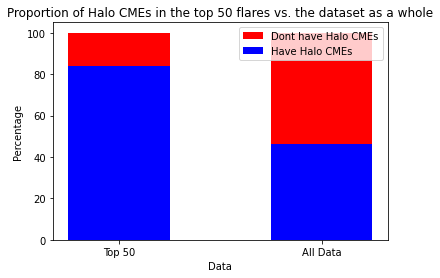

In [23]:
import matplotlib.pyplot as plt 

top_50_count = nasa_top_50.loc[nasa_top_50['is_halo'] == True].shape[0]
nasa_count = nasa.loc[nasa['is_halo'] == True].shape[0]

nasa_count = nasa_count - top_50_count #remove the duplicates. nasa_count is also counting the ones in the top 50
top_50_count = top_50_count / nasa_top_50.shape[0] * 100
nasa_count = nasa_count / nasa.shape[0] * 100


countries = ['Top 50', 'All Data']
bottom = np.array([top_50_count, nasa_count])
top = np.array([100-top_50_count, 100-nasa_count])
idx = [x for x, _ in enumerate(countries)]

plt.bar(idx, top, width=0.5, label='Dont have Halo CMEs', color='red', bottom=bottom)
plt.bar(idx, bottom, width=0.5, label='Have Halo CMEs', color='blue')

plt.xticks(idx, countries)
plt.ylabel("Percentage")
plt.xlabel("Data")
plt.legend(loc="upper right")
plt.title("Proportion of Halo CMEs in the top 50 flares vs. the dataset as a whole")

plt.show()